## EDA

 This notebook focuses on understanding the structure, quality, and content of the Train.csv dataset prior to any modeling or preprocessing. Given the dataset’s high dimensionality (over 50 columns) and the presence of both numerical and categorical features, conducting exploratory data analysis (EDA) is a critical first step. The goal is to gain insights into variable distributions, detect missing values or anomalies, and better understand relationships between features—particularly in the context of predicting SalePrice, the target variable.

In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys

while any(marker in os.getcwd() for marker in ('exercises', 'notebooks', 'students', 'research', 'projects')):
    os.chdir("..")
sys.path.append('src')

####  Loading the dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [5]:
# Load environment variables from the correct .env file location
env_path = 'projects/proj_2_team_4/.env'
load_dotenv(env_path)

True

In [6]:
df = pd.read_csv(os.getenv('TRAIN_PATH'))
df.shape

/var/folders/w5/bqtvk3ss7gbf6xw9z7wqv6s80000gn/T/ipykernel_11119/2403031681.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.getenv('TRAIN_PATH'))


(401125, 53)

#### General Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

#### Data preview

In [9]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Missing data

In [5]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Tip_Control                 375906
Enclosure_Type              375906
Blade_Width                 375906
Pushblock                   375906
Engine_Horsepower           375906
Blade_Extension             375906
Scarifier                   375895
Grouser_Tracks              357763
Hydraulics_Flow             357763
Coupler_System              357667
fiModelSeries               344217
Steering_Controls           331756
Differential_Type           331714
UsageBand                   331486
fiModelDescriptor           329206
Backhoe_Mounting            322453
Turbocharged                321991
Stick                       321991
Pad_Type                    321991
Blade_Type                  321292
Travel_Controls             321291
Tire_Size                   306407
Track_Type                  301972
Grouser_Type                301972
Pattern_Changer             301907
Stick_Length                301907
Thumb                       301837
Undercarriage_Pad_Width     301253
Ripper              

#### Descriptive Statistics

In [6]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


#### Separating variable types

In [8]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Number of numeric columns: {len(numeric_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

Number of numeric columns: 8
Number of categorical columns: 45


#### Histograms for numeric columns

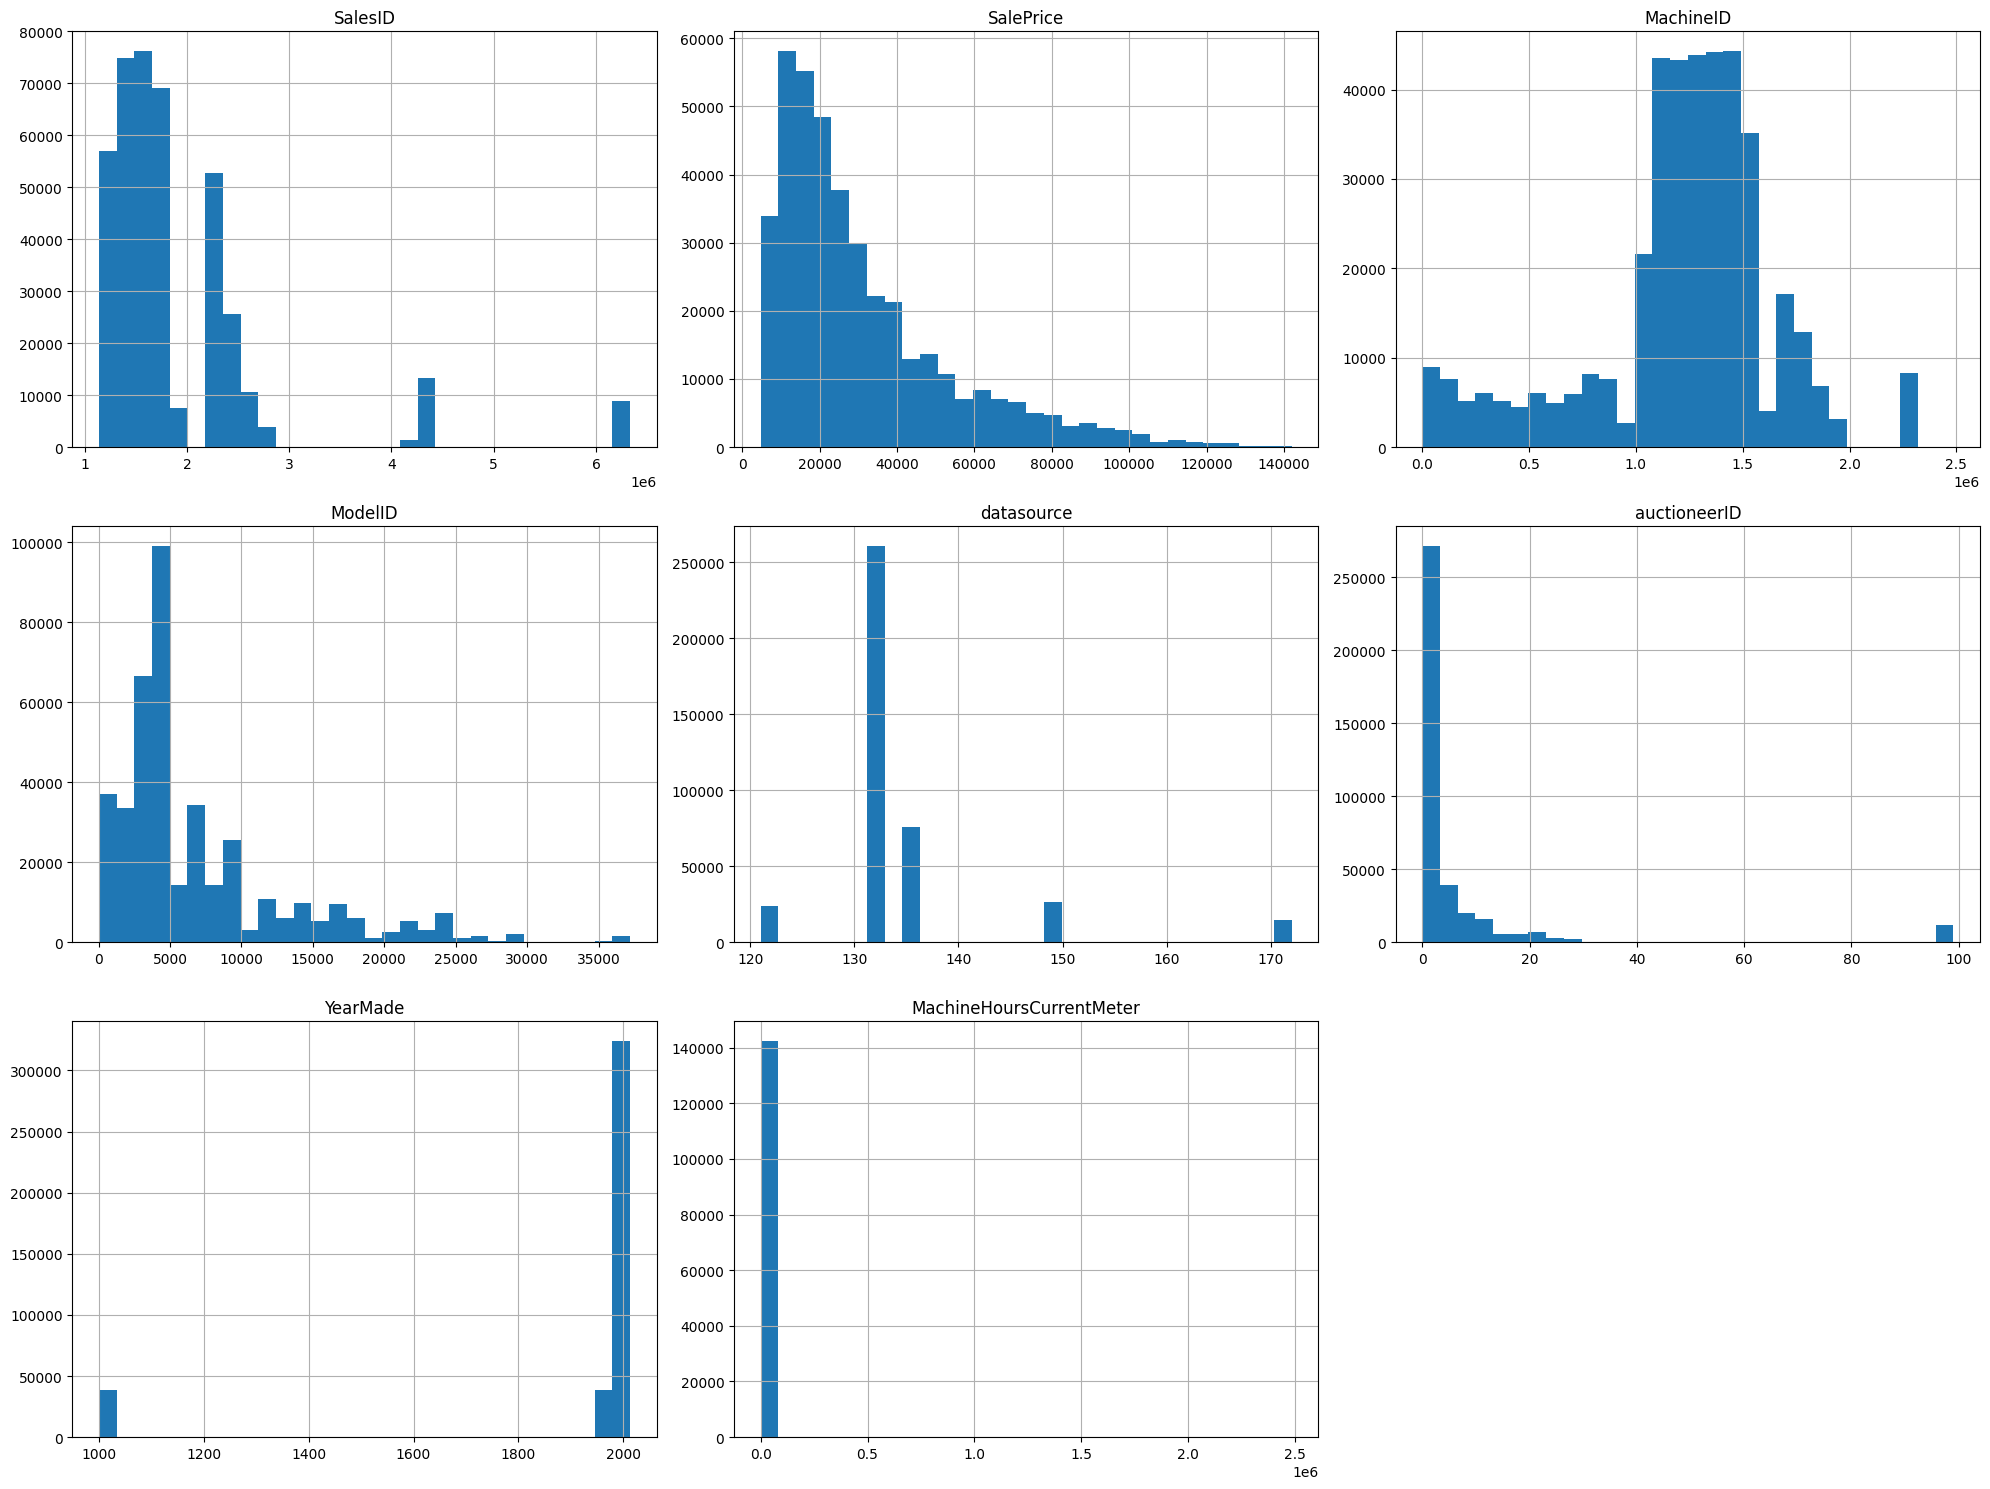

In [10]:
df[numeric_cols].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

#### SalePrice Target Variable Analysis

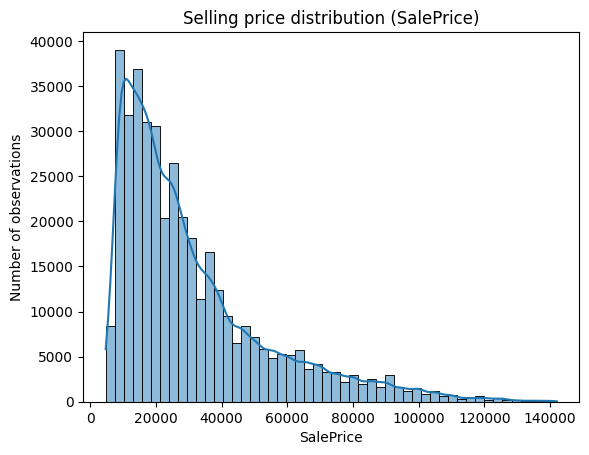

In [12]:
sns.histplot(df['SalePrice'], bins=50, kde=True)
plt.title('Selling price distribution (SalePrice)')
plt.xlabel('SalePrice')
plt.ylabel('Number of observations')
plt.show()

#### Correlation matrix

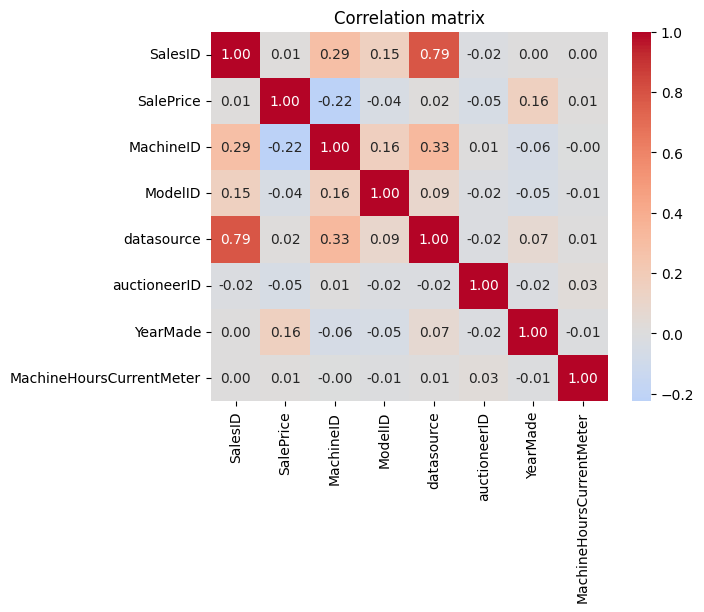

In [14]:
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title('Correlation matrix')
plt.show()


#### Summary

The exploratory data analysis (EDA) conducted on the `Train.csv` dataset highlighted several key characteristics and potential data quality issues relevant for further modeling:

- **Data structure**: The dataset contains over 400,000 observations and 53 columns, including a mix of numerical and categorical features.
- **Missing values**: Several columns have significant amounts of missing data, which may require imputation or removal depending on their relevance.
- **Feature distributions**: Most numerical features show skewed distributions; the target variable `SalePrice` is right-skewed.
- **Feature correlations**: Strong correlations were observed among some numerical variables, which could inform feature selection for predictive modeling.
- **Categorical diversity**: Many categorical features have high cardinality and may require encoding (e.g., One-Hot Encoding) before modeling.
